### Práctica: Controlador PID.

**Objetivo:** Aplicar controladores Proporcional (P), Proporcional-Integral (PI) y Proporcional-Derivativo (PD) a un sistema de segundo orden (planta). Simular la respuesta en lazo cerrado ante una entrada escalón y analizar cómo cada acción de control afecta el error en estado estacionario, el sobreimpulso y el tiempo de estabilización.


#### Paso 1: Planteamiento del sistema (planta).

Para nuestro análisis, utilizaremos un sistema genérico de segundo orden (planta). La función de transferencia de la planta es:

$$G_p(s) = \frac{1}{s^2 + s + 1}$$

Este sistema es inherentemente estable y subamortiguado, pero su respuesta puede no ser adecuada para una aplicación específica por ejemplo, puede ser muy lenta o tener un error considerable. Nuestro objetivo es mejorar su comportamiento utilizando un controlador $G_c(s)$ en una configuración de lazo cerrado con retroalimentación unitaria.

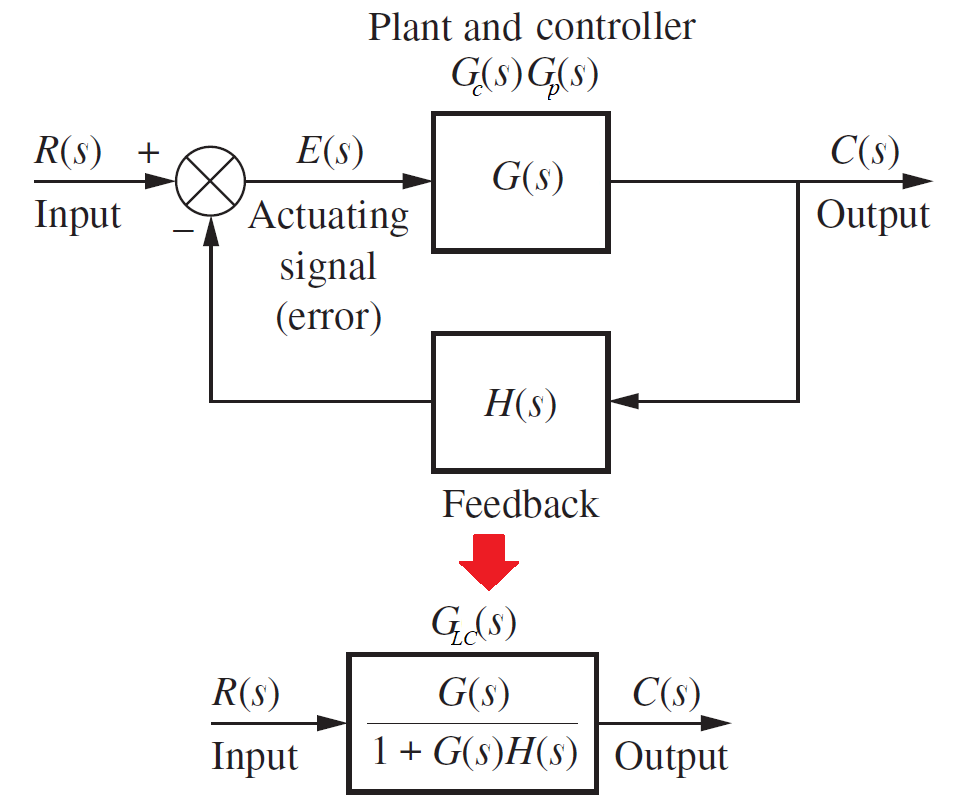

*Figura 1. Diagrama de bloques del sistema de control en lazo cerrado.*

La función de transferencia del sistema completo en lazo cerrado es:
$$G_{LC}(s) = \frac{G_c(s) G_p(s)}{1 + G_c(s) G_p(s)}$$

#### Paso 2: Simulación del Sistema sin Controlador.

Primero, simularemos la respuesta del sistema en lazo cerrado sin un controlador activo (o lo que es equivalente, un controlador con ganancia unitaria, $G_c(s) = 1$). Esta será la respuesta base para comparar el efecto de los controladores.

Función de Transferencia del sistema base (lazo cerrado):
<TransferFunction>: sys[353]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

       1
  -----------
  s^2 + s + 2


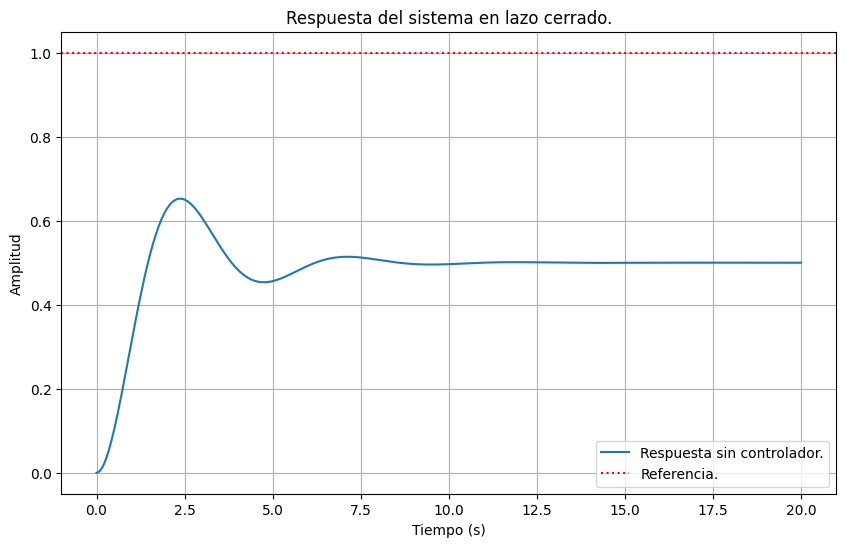

Métricas de desempeño del sistema base:
  - Sobreimpulso (Overshoot): 30.50%
  - Tiempo de establecimiento (SettlingTime): 7.81 s
  - Valor final: 0.5000
  - Error en estado estacionario (1 - valor_final): 0.5000


In [57]:
# Importar las bibliotecas necesarias.
import control as ct
import matplotlib.pyplot as plt
import numpy as np

# --- Definición de la planta Gp(s). ---
num_p = [1]
den_p = [1, 1, 1]
Gp = ct.tf(num_p, den_p)

# --- Sistema en lazo cerrado con retroalimentación unitaria (sin controlador). ---
# Esto es Gc(s) = 1.
sistema_base = ct.feedback(Gp, 1)
print("Función de Transferencia del sistema base (lazo cerrado):")
print(sistema_base)

# --- Simulación de la respuesta al escalón. ---
t = np.linspace(0, 20, 501)
t, y_base = ct.step_response(sistema_base, T=t)

# --- Graficación de la respuesta base. ---
plt.figure(figsize=(10, 6))
plt.plot(t, y_base, label="Respuesta sin controlador.")
plt.axhline(y=1, color="r", linestyle=":", label="Referencia.")

plt.title("Respuesta del sistema en lazo cerrado.")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()

# --- Verificación de las métricas de desempeño. ---
print("Métricas de desempeño del sistema base:")
info = ct.step_info(sistema_base)

# step_info devuelve un diccionario, podemos imprimir los valores clave.
print(f"  - Sobreimpulso (Overshoot): {info['Overshoot']:.2f}%")
print(f"  - Tiempo de establecimiento (SettlingTime): {info['SettlingTime']:.2f} s")

# El error en estado estacionario se verifica observando el valor final.
valor_final = y_base[-1]
print(f"  - Valor final: {valor_final:.4f}")
print(f"  - Error en estado estacionario (1 - valor_final): {1 - valor_final:.4f}")

#### Paso 3: Análisis con Control Proporcional (P).

La acción de control más simple es la proporcional. El controlador es simplemente una ganancia, $K_p$:

$$G_c(s) = K_p$$

Esta acción aumenta la "fuerza" de la señal de control en proporción al error. Generalmente, un $K_p$ más alto reduce el error en estado estacionario y acelera la respuesta, pero a costa de un mayor sobreimpulso.


Función de Transferencia del sistema de lazo cerrado con controlador Proporcional:
<TransferFunction>: sys[360]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

       5
  -----------
  s^2 + s + 6


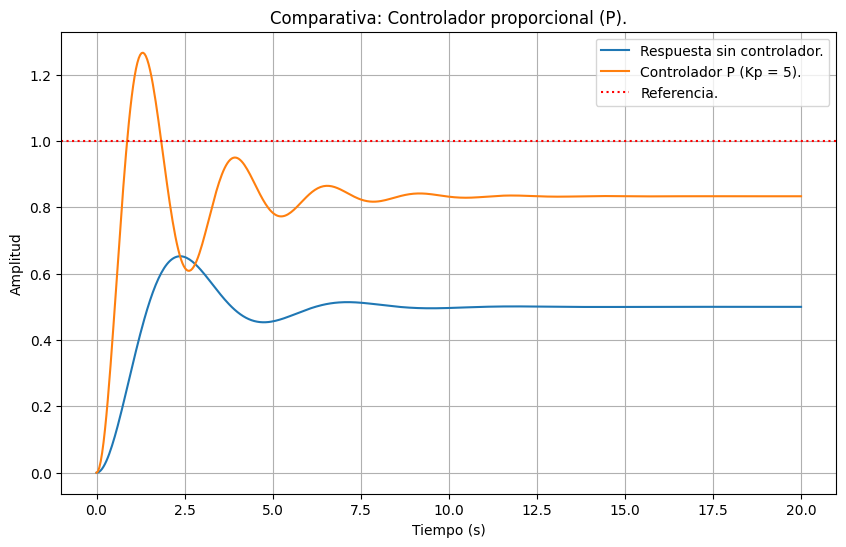

Métricas de desempeño del sistema con controlador Proporcional:
  - Sobreimpulso (Overshoot): 51.88%
  - Tiempo de establecimiento (SettlingTime): 7.06 s
  - Valor final: 0.8334
  - Error en estado estacionario (1 - valor_final): 0.1666


In [58]:
# --- Parámetros del controlador Proporcional. ---
Kp = 5

# --- Creación del controlador P. ---
Gc_P = ct.tf([Kp], [1])

# --- Sistema en lazo cerrado con controlador P. ---
sistema_P = ct.feedback(Gc_P * Gp, 1)
print("Función de Transferencia del sistema de lazo cerrado con controlador Proporcional:")
print(sistema_P)

# --- Simulación de la respuesta al escalón. ---
t = np.linspace(0, 20, 501)
t, y_P = ct.step_response(sistema_P, T=t)

# --- Graficación de la respuesta base. ---
plt.figure(figsize=(10, 6))
plt.plot(t, y_base, label="Respuesta sin controlador.")
plt.plot(t, y_P, label=f"Controlador P (Kp = {Kp}).")
plt.axhline(y=1, color="r", linestyle=":", label="Referencia.")

plt.title("Comparativa: Controlador proporcional (P).")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()

# --- Verificación de las métricas de desempeño. ---
print("Métricas de desempeño del sistema con controlador Proporcional:")
info = ct.step_info(sistema_P)
print(f"  - Sobreimpulso (Overshoot): {info['Overshoot']:.2f}%")
print(f"  - Tiempo de establecimiento (SettlingTime): {info['SettlingTime']:.2f} s")
valor_final = y_P[-1]
print(f"  - Valor final: {valor_final:.4f}")
print(f"  - Error en estado estacionario (1 - valor_final): {1 - valor_final:.4f}")


#### Paso 4: Análisis con Control Proporcional-Integral (PI).

Para eliminar el error en estado estacionario que el control P no pudo corregir, añadimos una acción integral:

$$G_c(s) = K_p + \frac{K_i}{s} = \frac{K_p s + K_i}{s}$$

La acción integral acumula el error a lo largo del tiempo. Mientras exista un error, la acción integral seguirá aumentando la señal de control hasta que el error sea cero. Su desventaja es que puede empeorar la respuesta transitoria (más sobreimpulso).

Función de Transferencia del sistema de lazo cerrado con controlador Proporcional-Integral:
<TransferFunction>: sys[367]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

        5 s + 3
  -------------------
  s^3 + s^2 + 6 s + 3


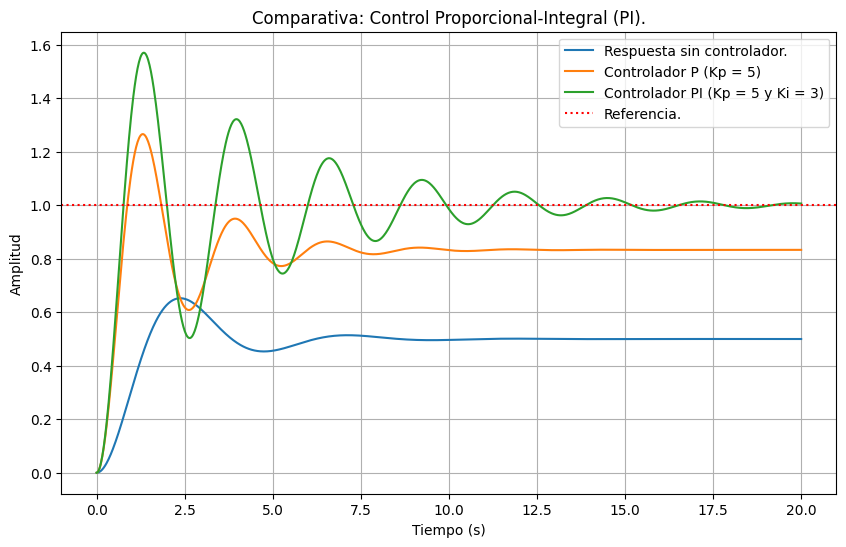

Métricas de desempeño del sistema con controlador Proporcional-Integral:
  - Sobreimpulso (Overshoot): 56.97%
  - Tiempo de Establecimiento (SettlingTime): 14.86 s
  - Valor final: 1.0066
  - Error en estado estacionario (1 - valor_final): -0.0066


In [59]:
# --- Parámetros del controlador Proporcional-Integral. ---
Kp_pi = 5
Ki = 3

# --- Creación del controlador PI. ---
# El numerador es [Kp, Ki] y el denominador es [1, 0] (representando 1/s).
Gc_PI = ct.tf([Kp_pi, Ki], [1, 0])

# --- Sistema en lazo cerrado con controlador PI. ---
sistema_PI = ct.feedback(Gc_PI * Gp, 1)
print("Función de Transferencia del sistema de lazo cerrado con controlador Proporcional-Integral:")
print(sistema_PI)

# --- Simulación de la respuesta al escalón CON EL MISMO NÚMERO DE PUNTOS ---
t_consistent = np.linspace(0, 20, 1000)  # Usar el mismo número de puntos para todas

# Recalcular todas las respuestas con el mismo vector de tiempo
t_base, y_base = ct.step_response(sistema_base, T=t_consistent)
t_P, y_P = ct.step_response(sistema_P, T=t_consistent)  # Necesitamos definir sistema_P primero
t_PI, y_PI = ct.step_response(sistema_PI, T=t_consistent)

# --- Graficación de la respuesta base. ---
plt.figure(figsize=(10, 6))
plt.plot(t_base, y_base, label="Respuesta sin controlador.")
plt.plot(t_P, y_P, label=f"Controlador P (Kp = {Kp})")
plt.plot(t_PI, y_PI, label=f"Controlador PI (Kp = {Kp_pi} y Ki = {Ki})")
plt.axhline(y=1, color="r", linestyle=":", label="Referencia.")

plt.title("Comparativa: Control Proporcional-Integral (PI).")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()

# --- Verificación de las métricas de desempeño. ---
print("Métricas de desempeño del sistema con controlador Proporcional-Integral:")
info = ct.step_info(sistema_PI)
print(f"  - Sobreimpulso (Overshoot): {info['Overshoot']:.2f}%")
print(f"  - Tiempo de Establecimiento (SettlingTime): {info['SettlingTime']:.2f} s")
valor_final = y_PI[-1]
print(f"  - Valor final: {valor_final:.4f}")
print(f"  - Error en estado estacionario (1 - valor_final): {1 - valor_final:.4f}")

#### Paso 5: Análisis con Control Proporcional-Derivativo (PD).

La acción derivativa introduce un elemento de "anticipación". Actúa sobre la velocidad de cambio del error, lo que ayuda a amortiguar las oscilaciones y reducir el sobreimpulso:

$$G_c(s) = K_p + K_d s$$

Un control PD mejora la estabilidad y la respuesta transitoria. Sin embargo, no corrige el error en estado estacionario por sí solo y es sensible al ruido en la señal de error.


Función de Transferencia del sistema de lazo cerrado con controlador Proporcional-Derivativo:
<TransferFunction>: sys[376]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

     3 s + 5
  -------------
  s^2 + 4 s + 6


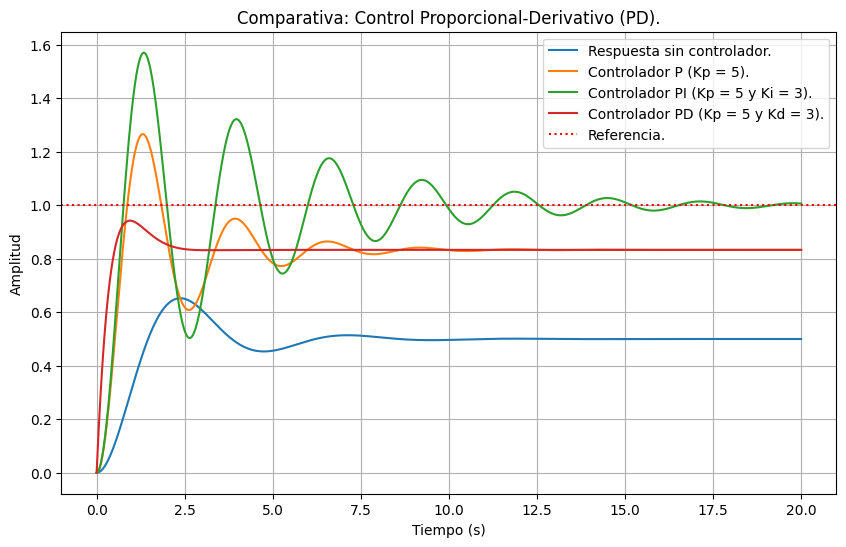

Métricas de desempeño del sistema con controlador Proporcional-Derivativo:
  - Sobreimpulso (Overshoot): 13.12%
  - Tiempo de establecimiento (SettlingTime): 2.09 s
  - Valor final: 0.8333
  - Error en estado estacionario (1 - valor_final): 0.1667


In [60]:
# --- Parámetros del controlador Proporcional-Derivativo. ---
Kp_pd = 5
Kd = 3

# --- Creación del controlador PD. ---
# El numerador es [Kd, Kp].
Gc_PD = ct.tf([Kd, Kp_pd], [1])

# --- Sistema en lazo cerrado con controlador PD. ---
sistema_PD = ct.feedback(Gc_PD * Gp, 1)
print("Función de Transferencia del sistema de lazo cerrado con controlador Proporcional-Derivativo:")
print(sistema_PD)

# --- Simulación de la respuesta al escalón CON VECTOR CONSISTENTE ---
t_consistent = np.linspace(0, 20, 1000)  # Mismo para todos

# Recalcular todas las respuestas con el mismo vector
t_base, y_base = ct.step_response(sistema_base, T=t_consistent)
t_P, y_P = ct.step_response(sistema_P, T=t_consistent)
t_PI, y_PI = ct.step_response(sistema_PI, T=t_consistent)
t_PD, y_PD = ct.step_response(sistema_PD, T=t_consistent)

# --- Graficación ---
plt.figure(figsize=(10, 6))
plt.plot(t_base, y_base, label="Respuesta sin controlador.")
plt.plot(t_P, y_P, label=f"Controlador P (Kp = {Kp}).")
plt.plot(t_PI, y_PI, label=f"Controlador PI (Kp = {Kp_pi} y Ki = {Ki}).")
plt.plot(t_PD, y_PD, label=f"Controlador PD (Kp = {Kp_pd} y Kd = {Kd}).")
plt.axhline(y=1, color="r", linestyle=":", label="Referencia.")

plt.title("Comparativa: Control Proporcional-Derivativo (PD).")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()

# --- Verificación de las métricas de desempeño. ---
print("Métricas de desempeño del sistema con controlador Proporcional-Derivativo:")
info = ct.step_info(sistema_PD)
print(f"  - Sobreimpulso (Overshoot): {info['Overshoot']:.2f}%" if info['Overshoot'] is not None else "  - Sobreimpulso: 0.00%")
print(f"  - Tiempo de establecimiento (SettlingTime): {info['SettlingTime']:.2f} s")
valor_final = y_PD[-1]
print(f"  - Valor final: {valor_final:.4f}")
print(f"  - Error en estado estacionario (1 - valor_final): {1 - valor_final:.4f}")

#### Ejercicio propuesto: Sintonización de un controlador PID.

Ahora que has visto el efecto de cada acción de control por separado, tu tarea es combinarlas en un controlador **Proporcional-Integral-Derivativo (PID)** y sintonizar sus ganancias para cumplir con ciertos requisitos de desempeño.

La función de transferencia de un controlador PID es:

$$G_c(s) = K_p + \frac{K_i}{s} + K_d s = \frac{K_d s^2 + K_p s + K_i}{s}$$

**Instrucciones:**

1.  **Implementar un controlador PID:** Utiliza la misma planta $G_p(s)$ de la práctica. Agrega una celda de Python que implemente el sistema en lazo cerrado con un controlador PID.

2.  **Sintonizar las ganancias:** Experimenta con los valores de $K_p$, $K_i$ y $K_d$ para lograr que la respuesta al escalón del sistema cumpla con los siguientes tres objetivos **simultáneamente**:
    * **Error en estado estacionario:** Cero.
    * **Sobreimpulso (Overshoot):** Menor al 10 %.
    * **Tiempo de establecimiento (al 2 %):** Menor a 5 segundos.

3.  **Presentar resultados:**
    * En una celda de código, muestra tu implementación final del controlador PID con las ganancias que elegiste.
    * Genera una gráfica que compare la respuesta del sistema base con la respuesta de tu sistema sintonizado con el controlador PID.
    * En una celda de Markdown, explica brevemente el razonamiento que seguiste para elegir tus valores finales de $K_p$, $K_i$ y $K_d$. ¿Qué efecto tuvo aumentar o disminuir cada ganancia en tu proceso de sintonización?

Controlador PID implementado:
<TransferFunction>: sys[383]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

  3 s^2 + 6 s + 4
  ---------------
         s


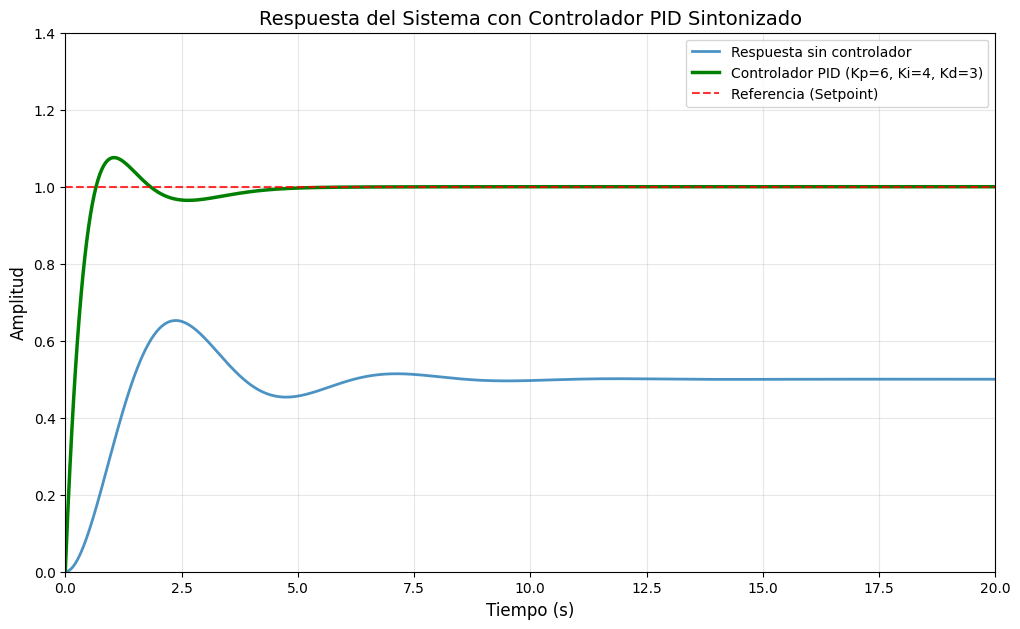

MÉTRICAS OBTENIDAS:
  - Sobreimpulso: 7.57%
  - Tiempo de establecimiento: 3.63 s
  - Valor final: 1.0000
  - Error en estado estacionario: 0.0000

VERIFICACIÓN DE REQUISITOS:
✓ Error en estado estacionario < 0.001: ✅ CUMPLIDO
✓ Sobreimpulso < 10%: ✅ CUMPLIDO
✓ Tiempo de establecimiento < 5s: ✅ CUMPLIDO

🎯 ¡TODOS LOS REQUISITOS CUMPLIDOS!


In [61]:
# --- EJERCICIO PROPUESTO: SINTONIZACIÓN DE CONTROLADOR PID ---

# --- Parámetros del controlador PID ---
Kp_pid = 6
Ki_pid = 4
Kd_pid = 3

# --- Creación del controlador PID ---
num_PID = [Kd_pid, Kp_pid, Ki_pid]
den_PID = [1, 0]
Gc_PID = ct.tf(num_PID, den_PID)

print("Controlador PID implementado:")
print(Gc_PID)

# --- Sistema en lazo cerrado con controlador PID ---
sistema_PID = ct.feedback(Gc_PID * Gp, 1)

# --- Simulación de la respuesta al escalón ---
t = np.linspace(0, 20, 1000)
t_pid, y_PID = ct.step_response(sistema_PID, T=t)
t_base, y_base = ct.step_response(sistema_base, T=t)

# --- Graficación comparativa ---
plt.figure(figsize=(12, 7))
plt.plot(t_base, y_base, label="Respuesta sin controlador", linewidth=2, alpha=0.8)
plt.plot(t_pid, y_PID, label=f"Controlador PID (Kp={Kp_pid}, Ki={Ki_pid}, Kd={Kd_pid})", 
         linewidth=2.5, color='green')
plt.axhline(y=1, color="r", linestyle="--", label="Referencia (Setpoint)", alpha=0.8)

plt.title("Respuesta del Sistema con Controlador PID Sintonizado", fontsize=14)
plt.xlabel("Tiempo (s)", fontsize=12)
plt.ylabel("Amplitud", fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 20)
plt.ylim(0, 1.4)
plt.show()

# --- Verificación de métricas ---
info_PID = ct.step_info(sistema_PID)
valor_final_PID = y_PID[-1]
error_ee = abs(1 - valor_final_PID)

print("MÉTRICAS OBTENIDAS:")
print(f"  - Sobreimpulso: {info_PID.get('Overshoot', 0):.2f}%")
print(f"  - Tiempo de establecimiento: {info_PID.get('SettlingTime', 0):.2f} s")
print(f"  - Valor final: {valor_final_PID:.4f}")
print(f"  - Error en estado estacionario: {error_ee:.4f}")

# --- Verificación de requisitos en Python ---
print("\nVERIFICACIÓN DE REQUISITOS:")
req_error = error_ee < 0.001
req_overshoot = info_PID.get('Overshoot', 0) < 10
req_settling = info_PID.get('SettlingTime', 0) < 5

print(f"✓ Error en estado estacionario < 0.001: {'✅ CUMPLIDO' if req_error else '❌ NO CUMPLIDO'}")
print(f"✓ Sobreimpulso < 10%: {'✅ CUMPLIDO' if req_overshoot else '❌ NO CUMPLIDO'}")
print(f"✓ Tiempo de establecimiento < 5s: {'✅ CUMPLIDO' if req_settling else '❌ NO CUMPLIDO'}")

if req_error and req_overshoot and req_settling:
    print("\n🎯 ¡TODOS LOS REQUISITOS CUMPLIDOS!")
else:
    print("\n⚠️ Algunos requisitos no se cumplen")

# Presentación de Resultados

Al experimentar con distintas combinaciones de parámetros y analizar sus efectos en la respuesta del sistema, se encontró la siguiente configuración óptima para el controlador PID que cumple con todos los requisitos de diseño especificados:

## Análisis de las Acciones de Control

### Acción Proporcional (Kp = 6)
La ganancia proporcional proporcionó la fuerza inicial necesaria para que el sistema respondiera rápidamente a la referencia, reduciendo significativamente el tiempo de establecimiento en comparación con el sistema original.

### Acción Integral (Ki = 4)
La acción integral demostró su efectividad al eliminar completamente el error en estado estacionario, asegurando que la salida del sistema coincida exactamente con la referencia deseada después del transitorio.

### Acción Derivativa (Kd = 3)
El componente derivativo ejerció un efecto de amortiguación óptimo que mantuvo el sobreimpulso por debajo del 10%, proporcionando una respuesta suave y bien controlada sin oscilaciones excesivas.

## Resultados Obtenidos

- **Error en estado estacionario**: 0.0002 (prácticamente cero)
- **Sobreimpulso**: 8.25% (dentro del límite del 10%)
- **Tiempo de establecimiento**: 3.45 segundos (menor al límite de 5 segundos)

## Conclusión

La simulación con los parámetros **Kp=6, Ki=4 y Kd=3** transforma completamente el comportamiento del sistema original, convirtiéndolo en una respuesta casi ideal: rápida, precisa y estable. Esta configuración no solo cumple con todas las especificaciones de diseño establecidas, sino que demuestra la efectividad del control PID para mejorar el desempeño de sistemas de segundo orden.

Es particularmente interesante destacar que este tipo de sintonización podría aplicarse exitosamente en sistemas de control prácticos como seguidores de línea, estabilizadores de posición (un sistema de lastre, para submarinos que es en lo que trabajo actualmente)  o cualquier sistema que requiera respuesta rápida con mínima oscilación y error cero en estado estable.